In [1]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

from   astropy.table import Table

In [2]:
def grab_ddplimit(fpath):
    dat = fits.open(fpath)

    result = {}
    
    for key in ['RLIM', 'GMR_0P0', 'GMR_0P1', 'ALL']:
        result[key] = dat[1].header[key]
        
    result['DATA'] = Table(dat[1].data)
    result['COUNT'] = fpath.split('_')[-1].replace('.fits', '')
    
    return result

In [3]:
! pwd

/cosma/home/durham/dc-wils7/DESI/docs/nb


In [4]:
fpaths = glob.glob(os.environ['HOME'] + '/data/GAMA4/ddrp_limits/*.fits')

In [5]:
ddp_limits = [grab_ddplimit(x) for x in fpaths]

In [6]:
gama_kE = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_kE.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64
32174,587722981741691177,183.70037809,-1.05288215,19.736502,0.08332,4,G12_Y2_043_160,5,21.557545,20.126371,19.787603,19.484722,19.264608,266.27475872158834,37.12664999915889,G12,-245.24125652386456,-15.860665751468476,-4.516540592019583,0.338768,0.35475794585729775,0,3,-0.10646642580750192,-0.1224563662936968,0.06937209369424623,0.060984572243037216,0.3471555268223028,2.12,-0.080820404,-0.1766384,-17.378699995134422,-17.28288200453336,37.11520168886001,37.01938369825895
144355,587724650867524042,179.66102327,-1.40728884,19.757875,0.25293,4,G12_Y2_044_206,5,21.755758,20.432243,19.696829,19.460794,19.193336,902.3148855942798,39.77679061016829,G12,-719.9340667453704,4.25936683630219,-17.686760009292964,0.7354145,0.44013276051430233,0,3,-0.09365587645106356,0.201625868039517,0.09549166349861014,0.41068063584072967,0.4202255326627633,2.12,-0.24534209,-0.53621155,-19.86906474043612,-19.57819528092627,39.626940182941006,39.336070723431156
124541,587724649256976626,179.89751219,-2.57730755,18.748053,0.15081,4,G12_Y5_027_201,6,21.232367,19.656624,18.665045,18.255375,17.882515,505.0130530866764,38.51651301742749,G12,-438.3880940653836,0.784167420215807,-19.73313642858396,0.99157906,0.8658975198450761,0,6,-0.04232290285814033,0.08335863308291636,0.18535825331634592,0.4453724584118625,0.7315648506906163,0.8,-0.14628571,-0.120648004,-19.807532960978975,-19.83317066958331,38.55558555802487,38.58122326662921
118797,587724648722006137,184.17555062,-2.99648752,18.028751,0.11158,4,G12_Y6_043_164,6,20.562859,18.805058,17.933498,17.555489,17.241117,363.8204262003115,37.804435391408795,G12,-325.9851692787255,-23.79900353827768,-17.10953455603715,0.87155914,0.846260624586955,0,5,-0.08973139552262453,-0.06443287704317324,0.138306210819992,0.2904407874267772,0.719424566459621,0.8,-0.1082326,-0.089264,-19.805757626460696,-19.82472623096576,37.83450899975171,37.853477604256774
39636,587722982275940549,177.66111022,-0.65931048,19.175905,0.14049,4,G12_Y2_019_297,6,22.140453,20.212257,19.111605,18.726572,18.40837,467.2312176782153,38.34765926055226,G12,-409.30744566436306,16.7177603718603,-4.714092626245793,1.1006527,0.9885261358871473,0,6,-0.046882715559202016,0.06524384325579918,0.18560653482909367,0.46074934236301524,0.8255098871682269,0.8,-0.1362753,-0.112392,-19.221085261376192,-19.24496856686621,38.39699048903732,38.42087379452734
341716,587726032799858903,212.96405368,2.36821727,18.925417,0.25699,4,G15_Y6_105_385,6,21.217352,20.138872,18.947233,18.411552,18.151215,918.9550785270128,39.8164714109857,G15,-612.8576499598569,-397.4479849236432,30.20909526144918,1.191639,0.7982611128344725,0,5,0.06372051945530774,0.4570983531540385,0.2926294159794649,0.7945189411289031,0.6897494213837649,0.8,-0.24928029,-0.20559199,-20.934403591738533,-20.978091889010262,39.85982053814966,39.90350883542139
346622,587726033302389048,134.55743422,2.16600461,18.550014,0.1138,4,G09_Y1_DX1_144,6,20.010414,19.038668,18.566885,18.253822,18.143185,371.63282964275743,37.85057036060853,G9,-233.93801379220335,237.5802013794907,12.61072730288422,0.47178268,0.45405717816186836,0,3,-0.0990554698929135,-0.08132996372861001,0.09240966370203835,0.13238969854732974,0.4318026494808805,2.12,-0.110386,-0.24125598,-19.28257952937744,-19.15170954475067,37.8325940252270

In [7]:
gama_ddp = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_ddp.fits')
gama_ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3]
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64
32174,587722981741691177,183.70037809,-1.05288215,19.736502,0.08332,4,G12_Y2_043_160,5,21.557545,20.126371,19.787603,19.484722,19.264608,266.27475872158834,37.12664999915889,G12,-245.24125652386456,-15.860665751468476,-4.516540592019583,0.338768,0.35475794585729775,0,3,-0.10646642580750192,-0.1224563662936968,0.06937209369424623,0.060984572243037216,0.3471555268223028,2.12,-0.080820404,-0.1766384,-17.378699995134422,-17.28288200453336,37.11520168886001,37.01938369825895,0.06349754,0.08582235568257114,0.0,-7.7365017,0.002394387322182377,0.0,0 .. 0
144355,587724650867524042,179.66102327,-1.40728884,19.757875,0.25293,4,G12_Y2_044_206,5,21.755758,20.432243,19.696829,19.460794,19.193336,902.3148855942798,39.77679061016829,G12,-719.9340667453704,4.25936683630219,-17.686760009292964,0.7354145,0.44013276051430233,0,3,-0.09365587645106356,0.201625868039517,0.09549166349861014,0.41068063584072967,0.4202255326627633,2.12,-0.24534209,-0.53621155,-19.86906474043612,-19.57819528092627,39.626940182941006,39.336070723431156,0.042123795,0.25840545857317754,0.0,-7.7578754,0.006874951846856747,0.0,0 .. 0
124541,587724649256976626,179.89751219,-2.57730755,18.748053,0.15081,4,G12_Y5_027_201,6,21.232367,19.656624,18.665045,18.255375,17.882515,505.0130530866764,38.51651301742749,G12,-438.3880940653836,0.784167420215807,-19.73313642858396,0.99157906,0.8658975198450761,0,6,-0.04232290285814033,0.08335863308291636,0.18535825331634592,0.4453724584118625,0.7315648506906163,0.8,-0.14628571,-0.120648004,-19.807532960978975,-19.83317066958331,38.55558555802487,38.58122326662921,1.0519466,0.2295906335782965,0.0,-6.7480526,0.007698888379481501,0.0,0 .. 0
118797,587724648722006137,184.17555062,-2.99648752,18.028751,0.11158,4,G12_Y6_043_164,6,20.562859,18.805058,17.933498,17.555489,17.241117,363.8204262003115,37.804435391408795,G12,-325.9851692787255,-23.79900353827768,-17.10953455603715,0.87155914,0.846260624586955,0,5,-0.08973139552262453,-0.06443287704317324,0.138306210819992,0.2904407874267772,0.719424566459621,0.8,-0.1082326,-0.089264,-19.805757626460696,-19.82472623096576,37.83450899975171,37.853477604256774,1.7712479,0.22928748445538527,0.0,-6.0287514,0.007668184907096908,0.0,0 .. 0
39636,587722982275940549,177.66111022,-0.65931048,19.175905,0.14049,4,G12_Y2_019_297,6,22.140453,20.212257,19.111605,18.726572,18.40837,467.2312176782153,38.34765926055226,G12,-409.30744566436306,16.7177603718603,-4.714092626245793,1.1006527,0.9885261358871473,0,6,-0.046882715559202016,0.06524384325579918,0.18560653482909367,0.46074934236301524,0.8255098871682269,0.8,-0.1362753,-0.112392,-19.221085261376192,-19.24496856686621,38.39699048903732,38.42087379452734,0.624094,0.18038699378072803,0.0,-7.175905,0.005884411198319031,0.0,0 .. 0
341716,587726032799858903,212.96405368,2.36821727,18.925417,0.25699,4,G15_Y6_105_385,6,21.217352,20.138872,18.947233,18.411552,18.151215,918.9550785270128,39.8164714109857,G15,-612.8576499598569,-397.4479849236432,30.20909526144918,1.191639,0.7982611128344725,0,5,0.06372051945530774,0.4570983531540385,0.2926294159794649,0.7945189411289031,0.6897494213837649,0.8,-0.24928029,-0.2055

In [8]:
gama_ddp.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

0	9	12.000	0.443	0.423	False
1	18	19.800	0.785	0.682	True
2	1	12.000	0.298	0.299	True
3	25	19.800	0.785	0.682	False
4	14	19.800	0.131	0.164	True
5	5	12.000	0.933	0.773	True
6	10	12.000	0.603	0.555	False
7	21	19.800	0.131	0.164	False
8	0	12.000	0.131	0.164	True
9	24	19.800	0.603	0.555	False
10	15	19.800	0.298	0.299	True
11	4	12.000	0.785	0.682	True
12	11	12.000	0.785	0.682	False
13	20	19.800	1.067	0.900	True
14	8	12.000	0.298	0.299	False
15	19	19.800	0.933	0.773	True
16	2	12.000	0.443	0.423	True
17	26	19.800	0.933	0.773	False
19	6	12.000	1.067	0.900	True
20	13	12.000	1.067	0.900	False
21	22	19.800	0.298	0.299	False
							FAINT: 27
23	27	19.800	1.067	0.900	False
24	16	19.800	0.443	0.423	True
							BRIGHT: 7
25	7	12.000	0.131	0.164	False
26	12	12.000	0.933	0.773	False
27	23	19.800	0.443	0.423	False


(-16.5, -22.5)

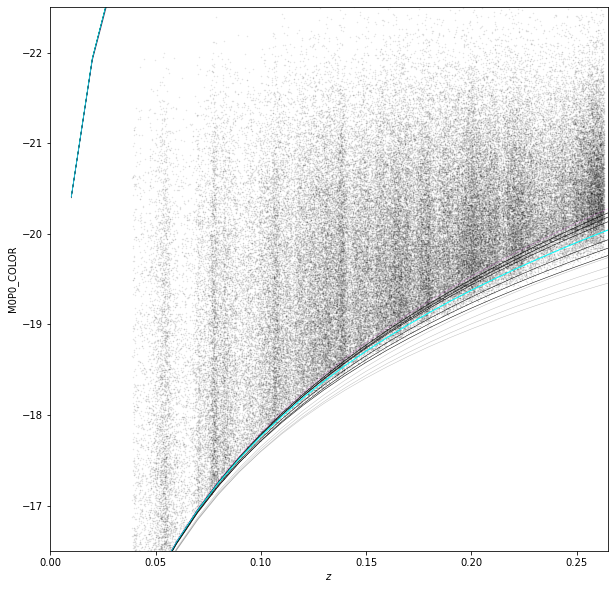

In [19]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

for i, ddp_limit in enumerate(ddp_limits):
    data = ddp_limit['DATA']

    cnt  = ddp_limit['COUNT']
    rlim = ddp_limit['RLIM']
    MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]
    
    if 'COLOR' in MCOL:
        alpha = 0.25
    else:
        alpha = 1.0
    
    if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
        ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
        continue
    
    if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tFAINT: {}'.format(cnt))
        
    elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tBRIGHT: {}'.format(cnt))
        
    else:
        ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
    
    print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))

plt.scatter(gama_kE['ZGAMA'], gama_kE['MALL_0P0'], s=0.25, alpha=0.1, c='k')
    
ax.set_xlabel(r'$z$')
ax.set_ylabel('M0P0_COLOR')

ax.set_xlim(  0.0, 0.265)
ax.set_ylim(-16.5, -22.5)

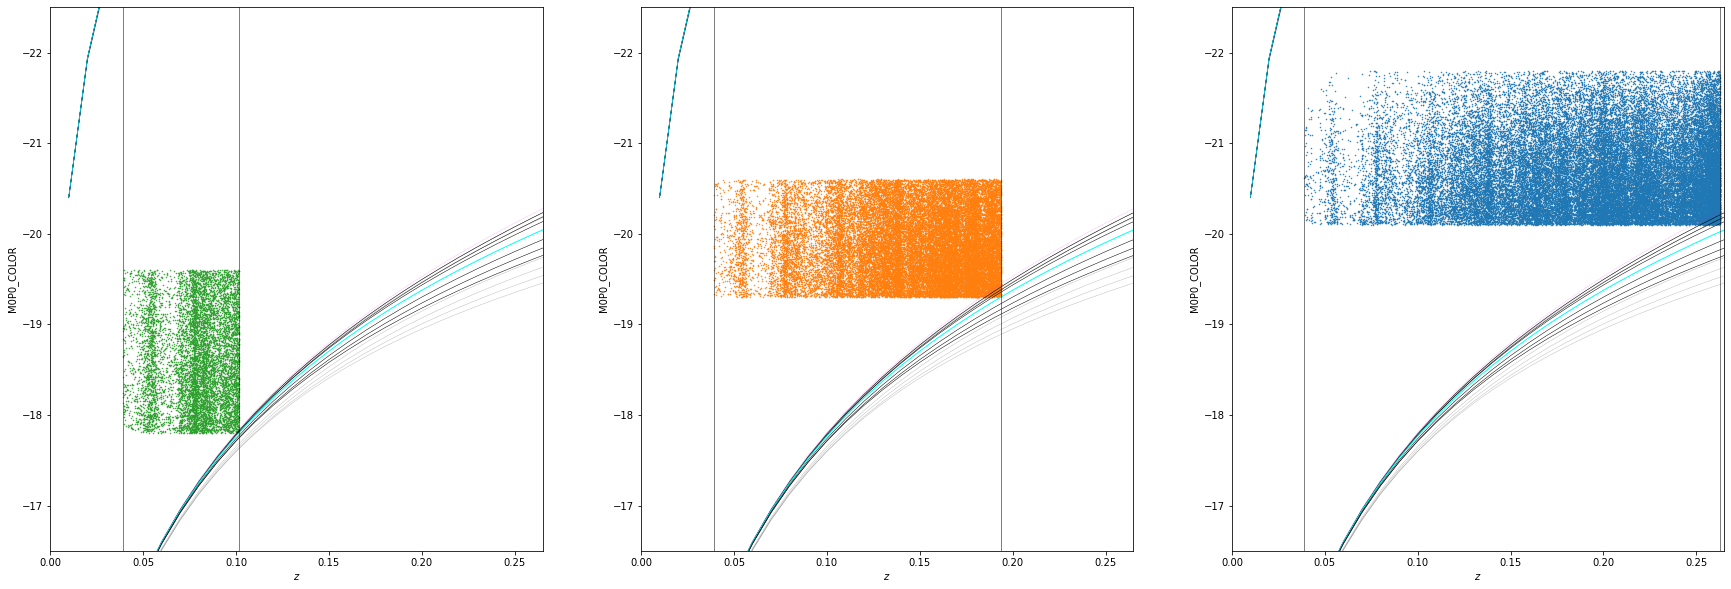

In [18]:
fig, axes = plt.subplots(1,3,figsize=(30,10))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for ax in axes:
    for i, ddp_limit in enumerate(ddp_limits):
        data = ddp_limit['DATA']

        cnt  = ddp_limit['COUNT']
        rlim = ddp_limit['RLIM']
        MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]

        if 'COLOR' in MCOL:
            alpha = 0.25
        else:
            alpha = 1.0

        if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
            ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
            continue
    
        if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        else:
            ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
        
        # print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
        ax.set_xlabel(r'$z$')
        ax.set_ylabel('M0P0_COLOR')

        ax.set_xlim(  0.0, 0.265)
        ax.set_ylim(-16.5, -22.5)

for i, ax in enumerate(axes[::-1]):    
    is_ddp = [x == 1 for x in gama_ddp['DDP'].data[:,i]]
    ax.scatter(gama_ddp['ZGAMA'][is_ddp], gama_ddp['MALL_0P0'][is_ddp], s=0.25, alpha=1., c=colors[i])

for idx, ax in zip(range(3), axes[::-1]):
    zmin = gama_ddp.meta['DDP{}_ZMIN'.format(idx+1)]
    zmax = gama_ddp.meta['DDP{}_ZMAX'.format(idx+1)]
    
    ax.axvline(zmin, lw=0.5, c='k')
    ax.axvline(zmax, lw=0.5, c='k')

# Done.